In [ ]:
!nvidia-smi
!pip install gdown
!pip install tensorflow_text
!pip install wordcloud
!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[]})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.test.is_gpu_available()

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

     |████████████████████████████████| 2.6MB 4.7MB/s 
     |████████████████████████████████| 320.4MB 46kB/s 
     |████████████████████████████████| 1.5MB 4.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

(1854, 3)
                       date  ...     label
0  2020-03-11T06:00:00.000Z  ...  negative
1  2020-03-11T06:00:00.000Z  ...  negative
2  2020-03-11T06:00:00.000Z  ...  negative
3  2020-03-11T06:00:00.000Z  ...  positive
4  2020-03-11T06:00:00.000Z  ...  negative

[5 rows x 3 columns]
negative    933
positive    710
neutral     211
Name: label, dtype: int64
(710, 3) (933, 3) (211, 3)
(1854, 3)
                       date  ...     label
0  2020-03-11T06:00:00.000Z  ...  positive
1  2020-03-11T18:00:00.000Z  ...  positive
2  2020-03-11T18:00:00.000Z  ...  positive
3  2020-03-11T18:00:00.000Z  ...  positive
4  2020-03-11T18:00:00.000Z  ...  positive

[5 rows x 3 columns]


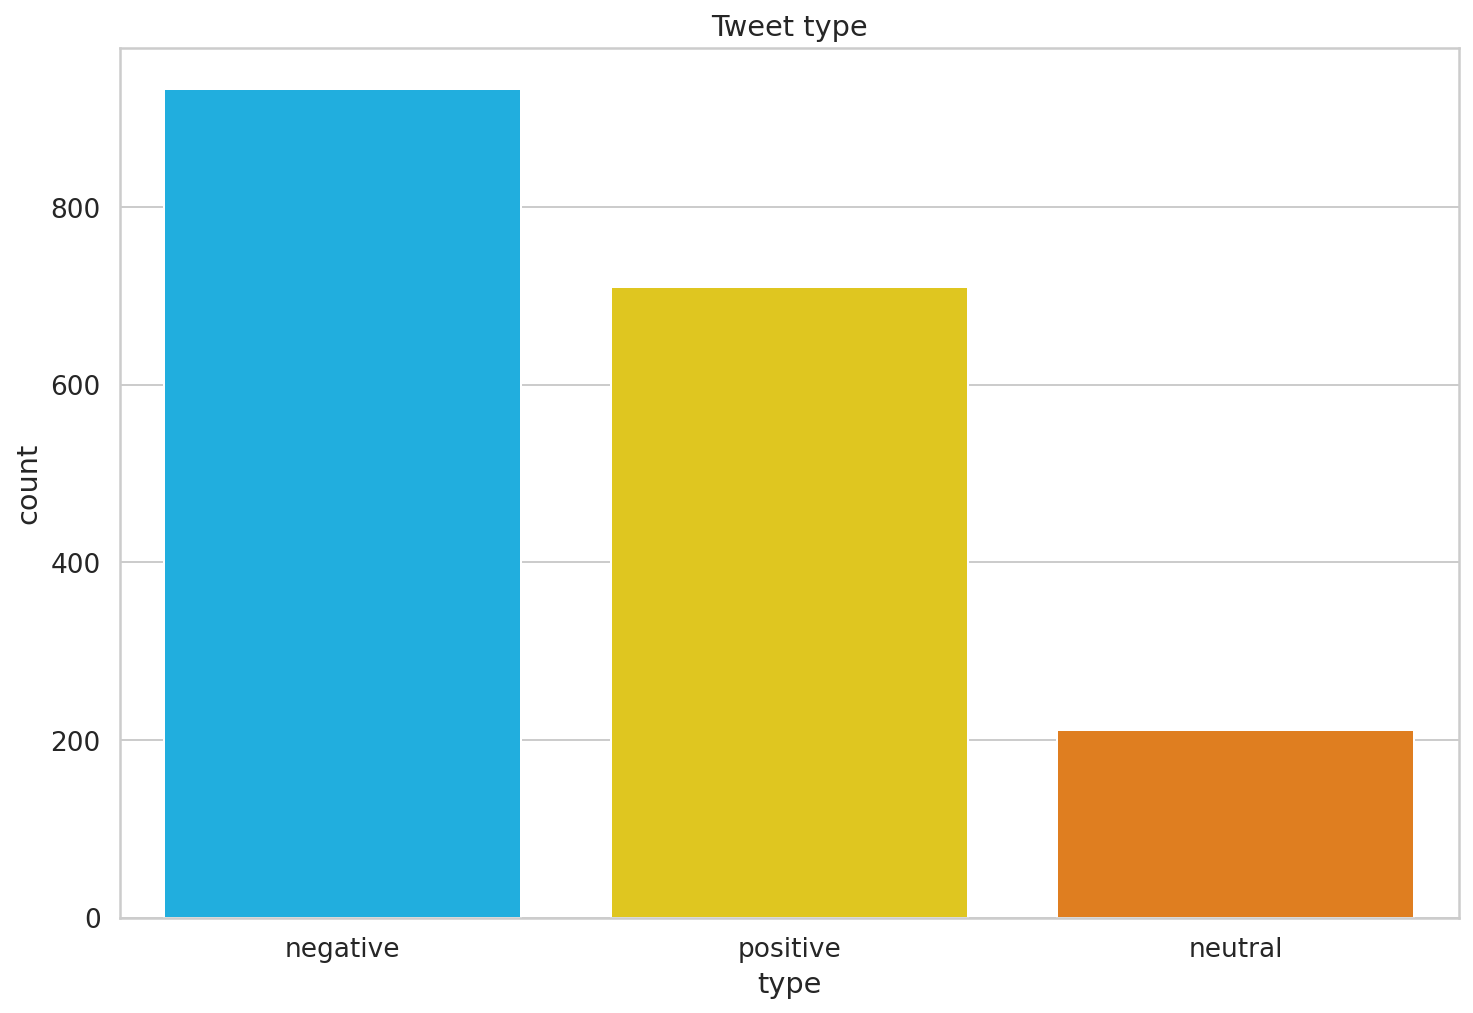

In [ ]:
rcParams['figure.figsize'] = 12, 8
df = pd.read_csv('../content/data.csv')
print(df.shape)
print(df.head())

print(df.label.value_counts())
sns.countplot(
  x='label',
  data=df,
  order=df.label.value_counts().index
)

plt.xlabel("type")
plt.title("Tweet type");


positive_tweets = df[df.label == "positive"]
negative_tweets = df[df.label == "negative"]
neutral_tweets = df[df.label == "neutral"]


print(positive_tweets.shape, negative_tweets.shape, neutral_tweets.shape)

pos_df = positive_tweets
neg_df = negative_tweets
neu_df = neutral_tweets
tweet_df = pos_df.append(neg_df).append(neu_df).reset_index(drop=True)
print(tweet_df.shape)
print(tweet_df.head())

In [ ]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
sent_1 = ["My Name is Sakib"]
sent_2 = ["amazing location"]

emb_1 = use(sent_1)
emb_2 = use(sent_2)
print(emb_1.shape)
np.inner(emb_1, emb_2).flatten()[0]

(1, 512)


0.10274981

Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  tweet_df.label.to_numpy().reshape(-1, 1)
)

print(tweet_df)
train_tweets, test_tweets, y_train, y_test =\
  train_test_split(
    tweet_df.text, 
    type_one_hot, 
    test_size=.2, 
    random_state=RANDOM_SEED
  )

X_train = []
for r in tqdm(train_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(tweet_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(tweet_emb)

X_test = np.array(X_test)
print(X_train.shape, X_test.shape)
print()
print(X_train.shape, y_train.shape)

  0%|          | 2/1483 [00:00<01:24, 17.52it/s]

                          date  ...     label
0     2020-03-11T06:00:00.000Z  ...  positive
1     2020-03-11T18:00:00.000Z  ...  positive
2     2020-03-11T18:00:00.000Z  ...  positive
3     2020-03-11T18:00:00.000Z  ...  positive
4     2020-03-11T18:00:00.000Z  ...  positive
...                        ...  ...       ...
1849  2020-03-11T18:00:00.000Z  ...   neutral
1850  2020-03-11T18:00:00.000Z  ...   neutral
1851  2020-03-11T18:00:00.000Z  ...   neutral
1852  2020-03-11T18:00:00.000Z  ...   neutral
1853  2020-03-11T18:00:00.000Z  ...   neutral

[1854 rows x 3 columns]


100%|██████████| 371/371 [00:23<00:00, 15.95it/s]

(1483, 512) (371, 512)

(1483, 512) (1483, 3)


DNN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(2259, 512) (2259, 3)
Negative: 753 
Neutral: 753 
Positive: 753


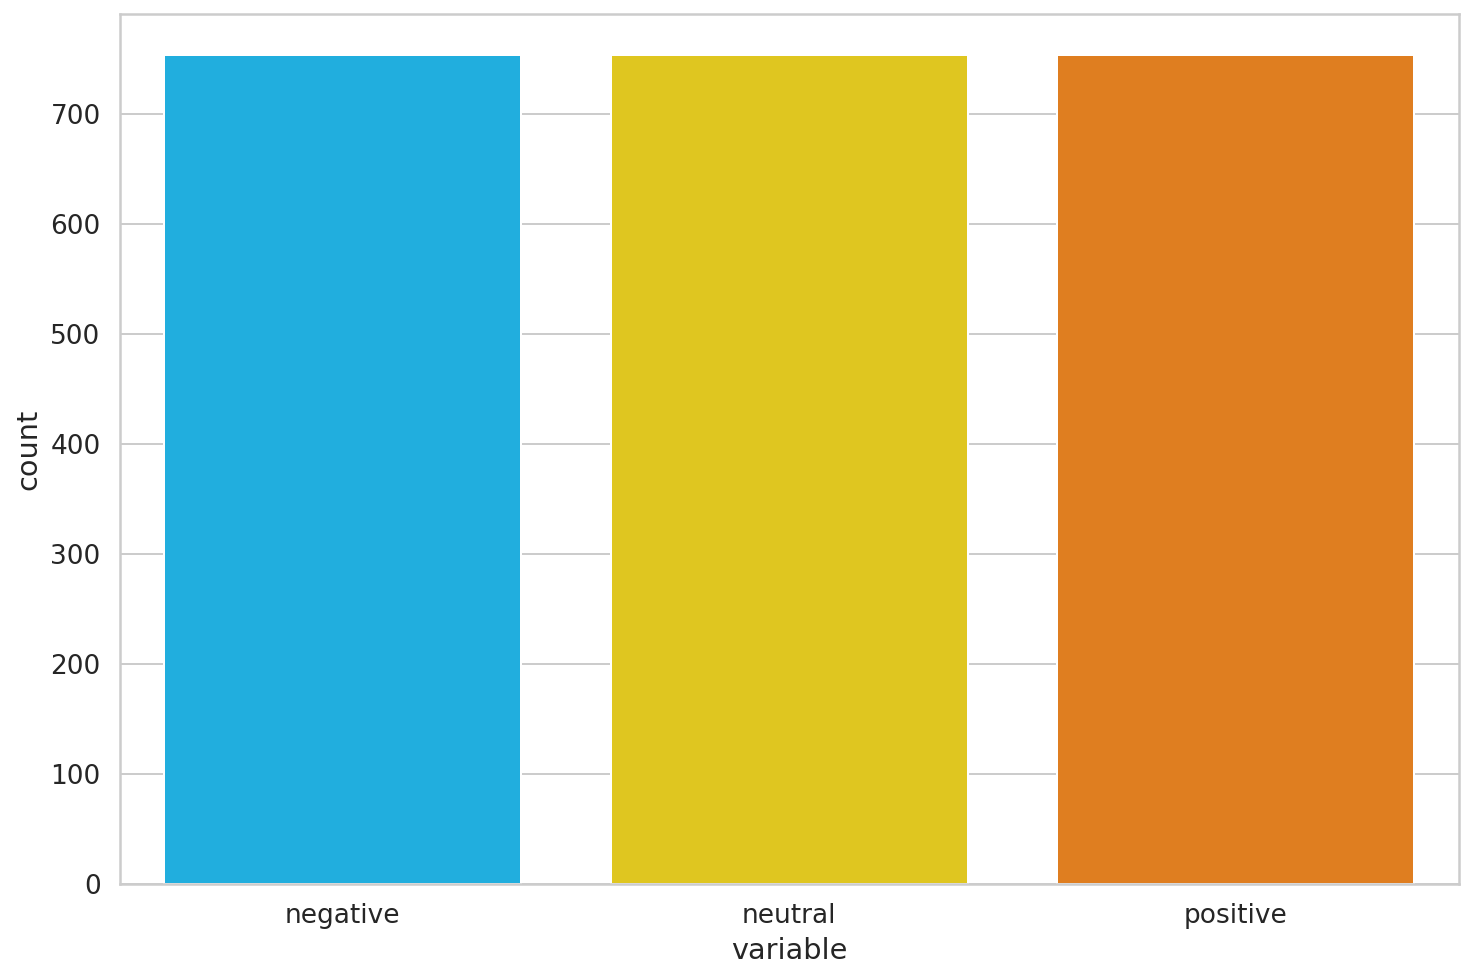

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
from imblearn.over_sampling import SMOTE

sm = SMOTE('not majority')
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape, y_train.shape)
gggg = pd.DataFrame(y_train)
gggg.columns = ['negative', 'neutral','positive']

print(f"Negative: {gggg.negative.value_counts()[1]} \nNeutral: {gggg.neutral.value_counts()[1]} \nPositive: {gggg.positive.value_counts()[1]}")
ggggg = pd.melt(gggg)
sns.countplot(data=ggggg.loc[ggggg['value']!=0], x='variable')

Model

Epoch 1/100
4/4 [==============================] - 1s 217ms/step - loss: 1.0963 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 4066.0000 - fn: 2033.0000 - accuracy: 0.3497 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5269 - val_loss: 1.1483 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 452.0000 - val_fn: 226.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0999
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0893 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 4066.0000 - fn: 2033.0000 - accuracy: 0.3792 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5655 - val_loss: 1.1878 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 452.0000 - val_fn: 226.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.1025
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 1.0810 - tp: 2.0000 - fp: 0.0000e+00 - tn: 4066.0000 - fn: 2031.0000 - accuracy: 0.3901

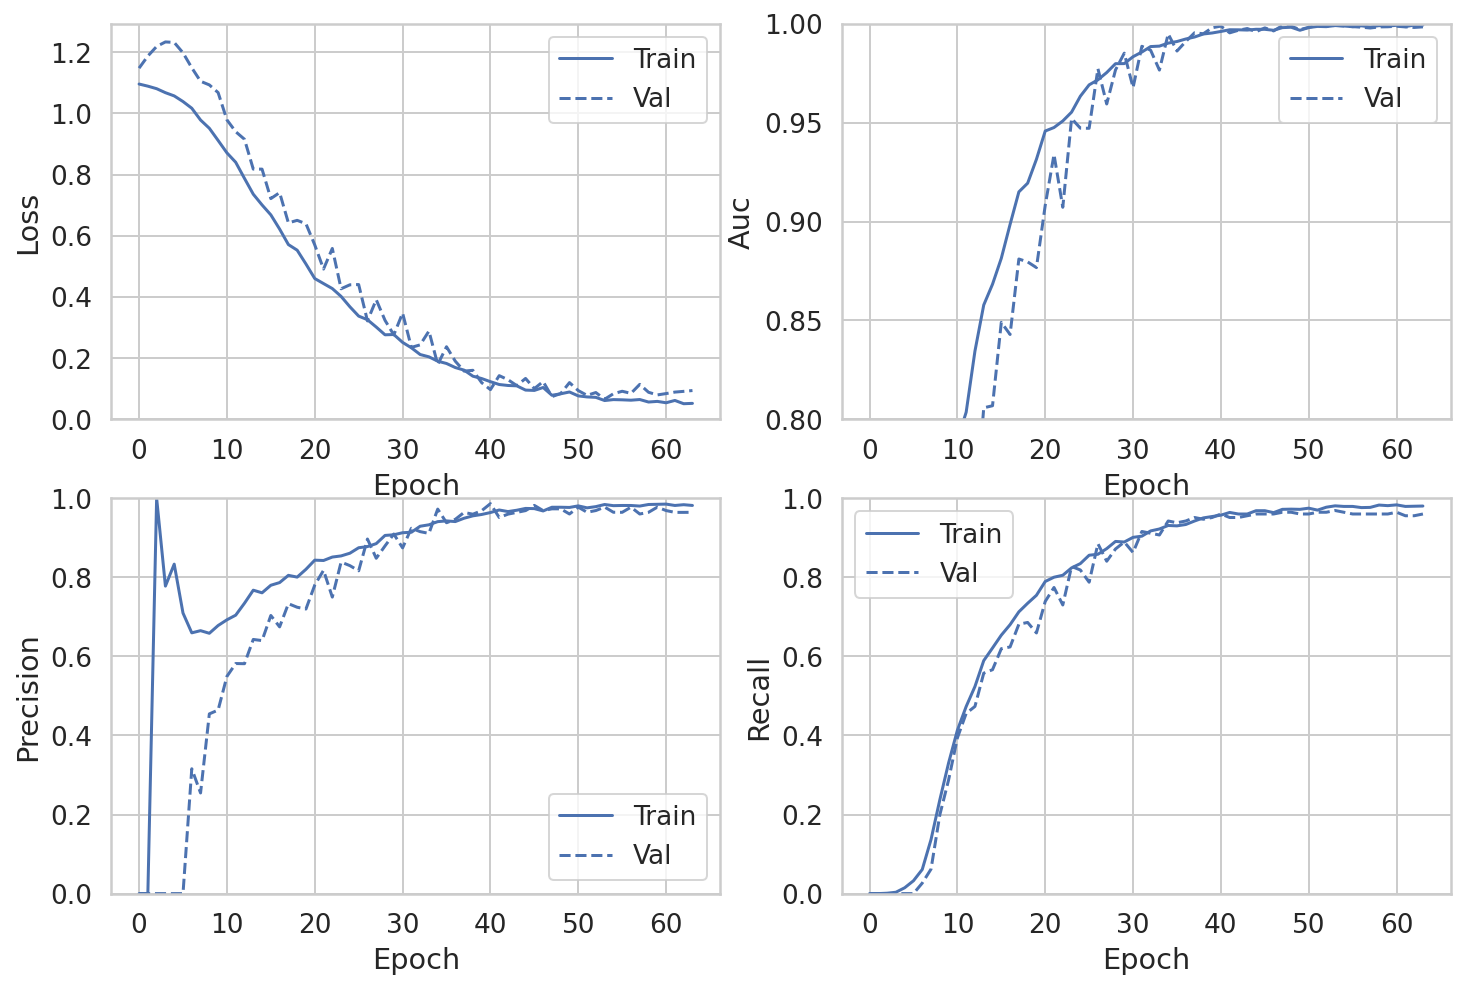

In [ ]:
   model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    #metrics=['accuracy']
    metrics=METRICS
)

EPOCHS = 100
BATCH_SIZE = 512

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

history = model.fit(
    X_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_split=0.1, 
    verbose=1, 
    callbacks = [early_stopping],
    shuffle=True
)

def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
      name = metric.replace("_"," ").capitalize()
      plt.subplot(2,2,n+1)
      plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])

      plt.legend()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();
plot_metrics(history)

print(model.evaluate(X_test, y_test))

train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print('(False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print('(True Positives): ', cm[1][1])
  print('Total : ', np.sum(cm[1]))


Evaluation With Confusion Matrix


loss :  2.0770721435546875
tp :  216.0
fp :  150.0
tn :  592.0
fn :  155.0
accuracy :  0.5876010656356812
precision :  0.5901639461517334
recall :  0.5822102427482605
auc :  0.7391148209571838

(True Negatives):  742
(False Positives):  7
(False Negatives):  0
(True Positives):  752
Total :  753
(True Negatives):  130
(False Positives):  10
(False Negatives):  28
(True Positives):  5
Total :  44


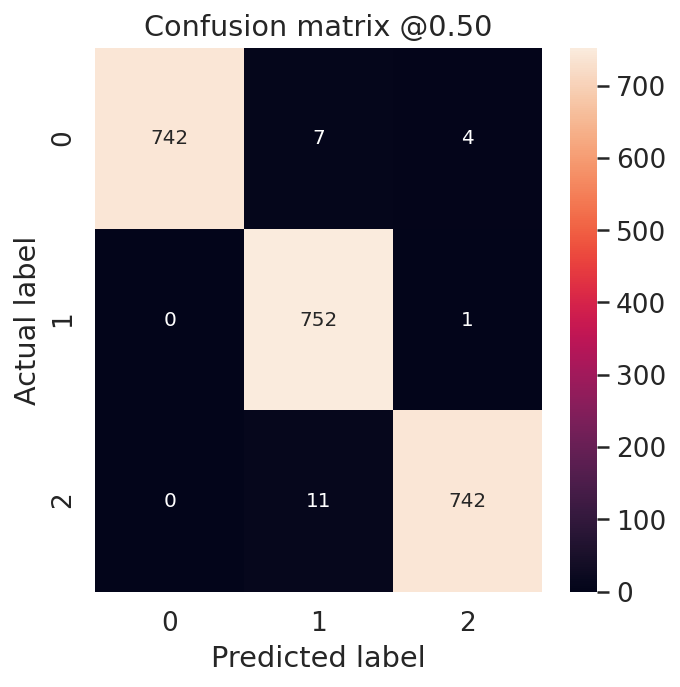

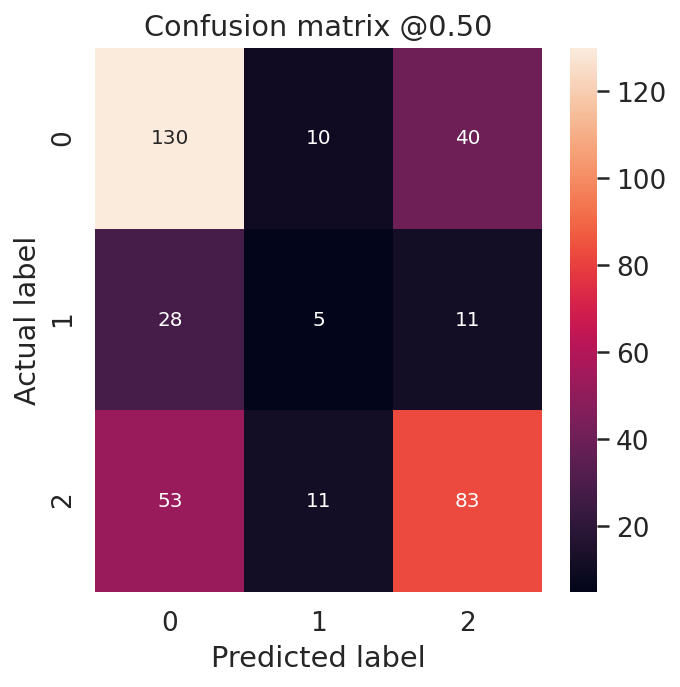

In [ ]:
baseline_results = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_train.argmax(axis=1), train_predictions_baseline.argmax(axis=1))
plot_cm(y_test.argmax(axis=1), test_predictions_baseline.argmax(axis=1))




ROC Curve for Traing and Testing data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


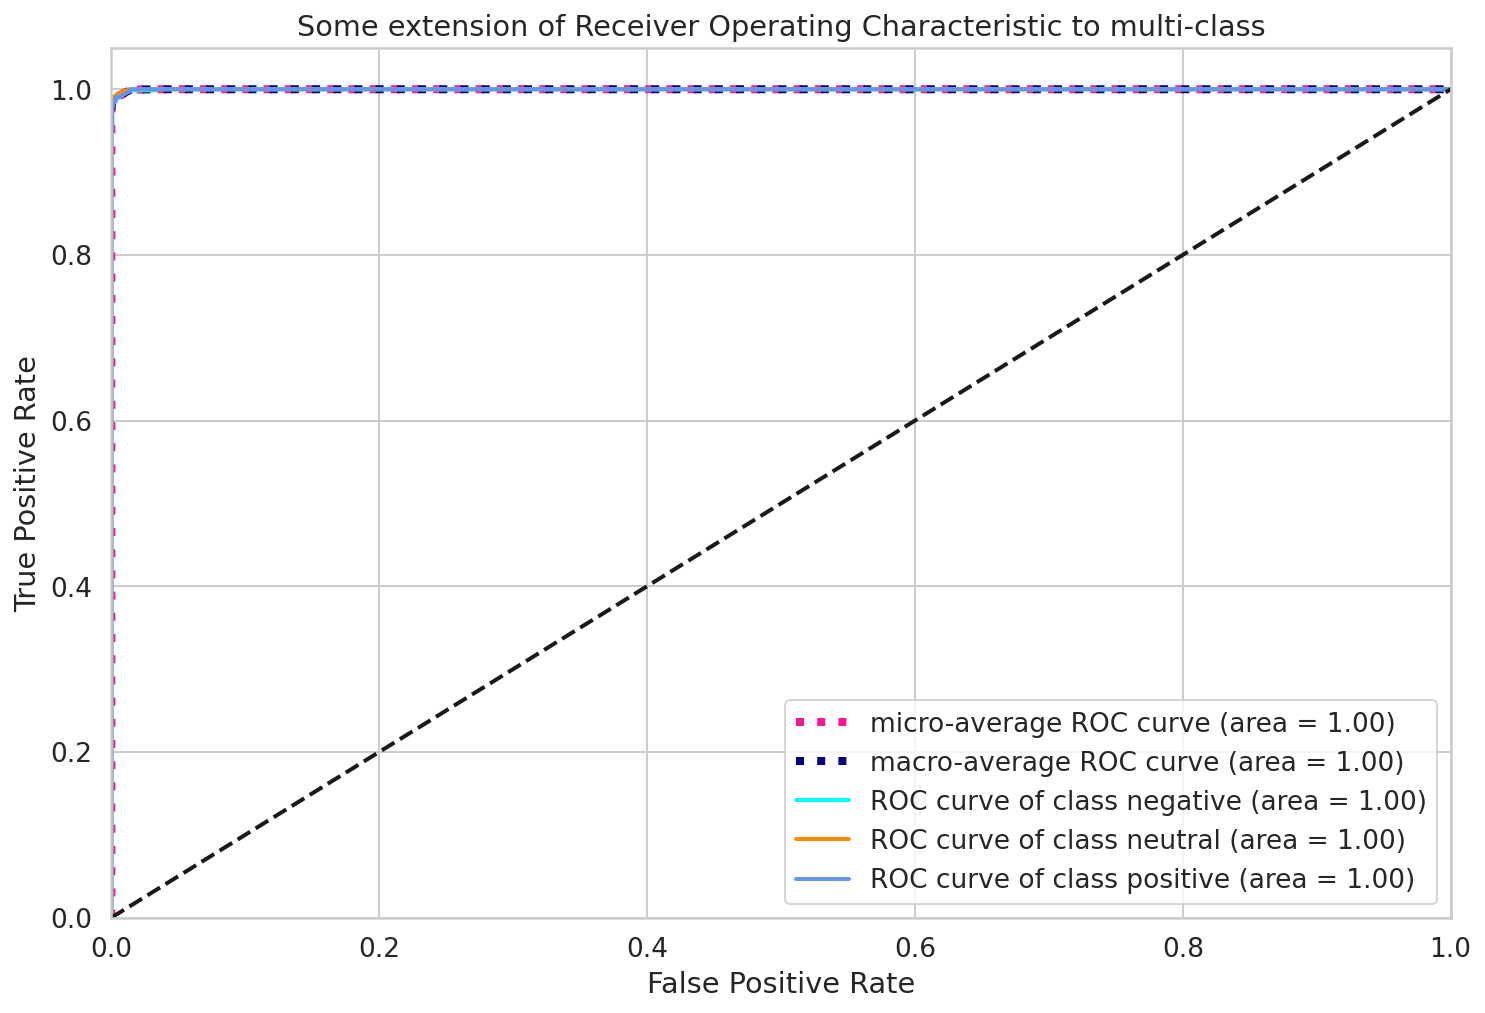

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


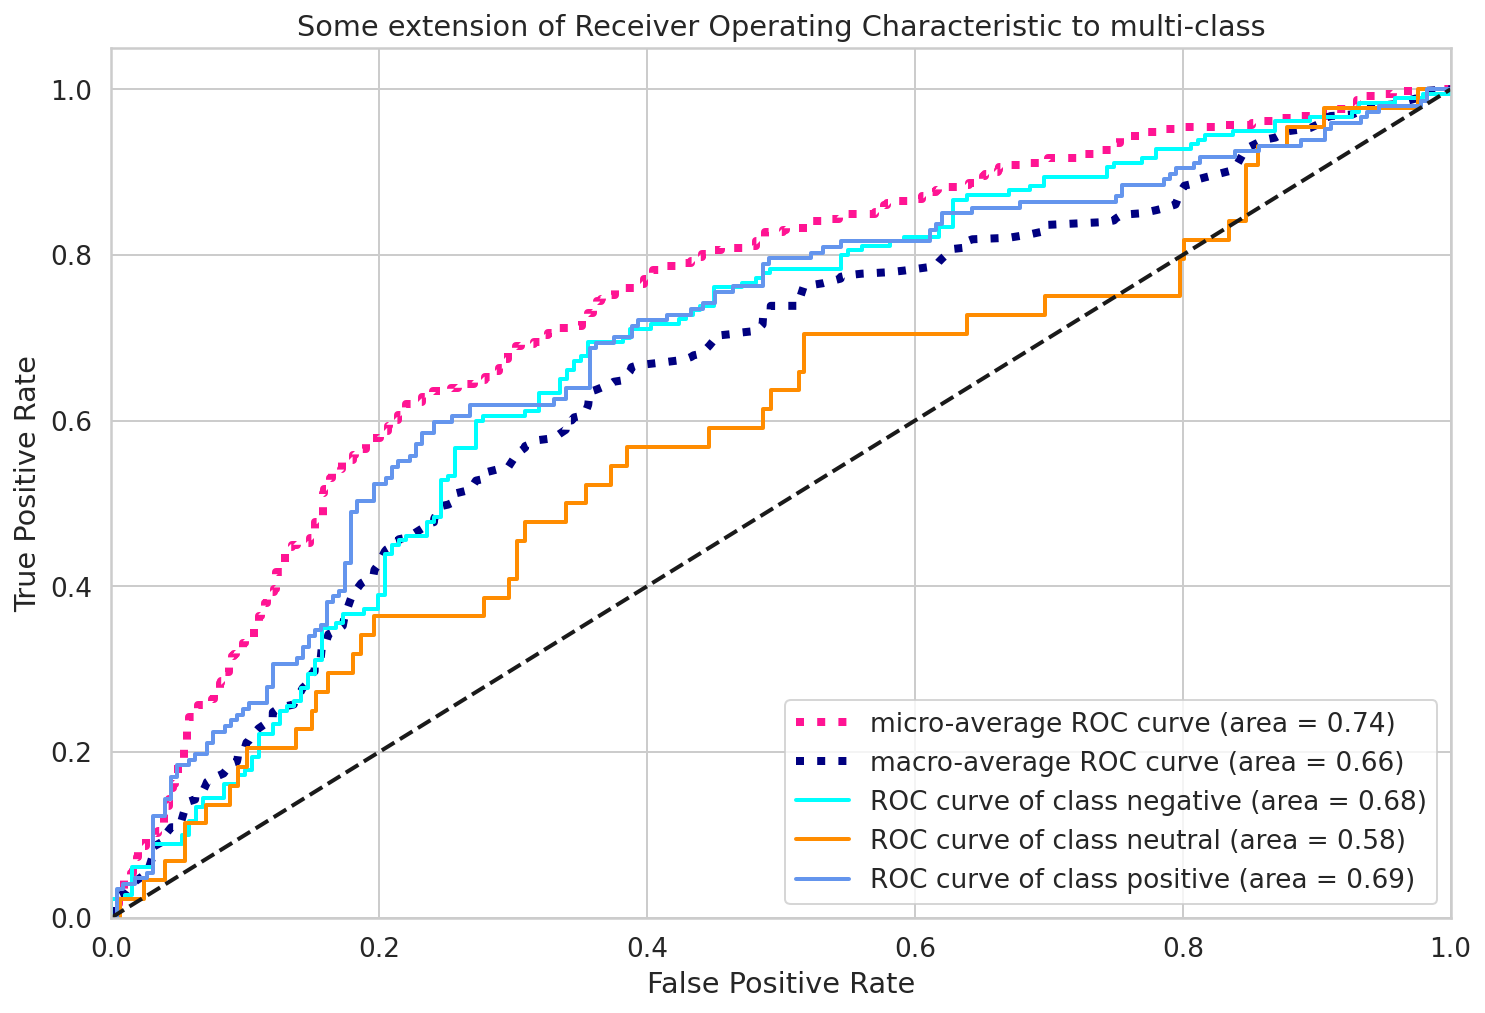

In [ ]:
import sklearn
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
import sklearn
from scipy import interp
from itertools import cycle
def plot_roc(name, labels, predictions, **kwargs):
  fpr = dict()
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  lw = 2
  n_classes = labels.shape[1]
  for i in range(n_classes):
    fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(labels[:, i], predictions[:, i])
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = sklearn.metrics.roc_curve(labels.ravel(), predictions.ravel())
  roc_auc["micro"] = sklearn.metrics.auc(fpr["micro"], tpr["micro"])


  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = sklearn.metrics.auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  class_label = ['negative','neutral', 'positive']
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_label[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver Operating Characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
# plt.legend(loc='lower right')

Testing User Input

In [ ]:
print(test_tweets.iloc[0])
print("negative" if y_test[0][0] == 1 else ("neutral" if y_test[0][1] == 1 else "positive"))
print(y_test[0])
y_pred = model.predict(X_test[:1])
print(y_pred)
print(np.argmax(y_pred))
"negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")
print(test_tweets.iloc[1])
print(y_test[1])
print("negative" if y_test[1][0] == 1 else ("neutral" if y_test[1][1] == 1 else "positive"))

y_pred = model.predict(X_test[1:2])
print(y_pred)
"negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")

print(test_tweets.iloc[5])
print("negative" if y_test[5][0] == 1 else ("neutral" if y_test[5][1] == 1 else "positive"))

y_pred = model.predict(X_test[5:6])
print(y_pred)
"negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")

test_str = "hello i am Mahbub"
#y_pred = model.predict([[np.array(tf.reshape(use(test_str), [-1]).numpy())]])
y_pred = model.predict(use(test_str))
print(y_pred)
"negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")

# save model
model.save("saved_model.h5")
print("Saved model")

# load model
import tensorflow as tf 
model = tf.keras.models.load_model('saved_model.h5')
model.summary()

quick covid19 break for some bachelor even if is not the person we saw on screen and even if ann is the most perfect girl on earth 1 didnt deserve to be so on national 2 Peter chose her It should be
positive
[0. 0. 1.]
[[7.4353366e-04 9.9906188e-01 1.9464882e-04]]
1
An invite for the ICT4D community to together to seek ways on how to put our research and at the service of emergency management find the most effective ways to do so COVID19
[0. 0. 1.]
positive
[[0.09937813 0.14023289 0.760389  ]]
27 new of COVID19 in confirmed today
negative
[[9.9843878e-01 5.9379276e-04 9.6740021e-04]]
[[9.9769467e-01 2.2022636e-04 2.0850503e-03]]
Saved model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_

Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Pre-processing for rest of the models

In [ ]:
df = tweet_df
df["label"] = df["label"].astype('category')
df['label']=df['label'].cat.codes
df["label"]=df["label"].astype('float')

Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
type_one_hot = tweet_df['label']

print(tweet_df)
train_tweets, test_tweets, y_train, y_test =\
  train_test_split(
    tweet_df.text, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )

X_train = []
for r in tqdm(train_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(tweet_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(tweet_emb)

X_test = np.array(X_test)
print(X_train.shape, X_test.shape)
print()
print(X_train.shape, y_train.shape)

sm = SMOTE('not majority')
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape, y_train.shape)

  0%|          | 2/1668 [00:00<02:01, 13.76it/s]

                          date  ... label
0     2020-03-11T06:00:00.000Z  ...   2.0
1     2020-03-11T18:00:00.000Z  ...   2.0
2     2020-03-11T18:00:00.000Z  ...   2.0
3     2020-03-11T18:00:00.000Z  ...   2.0
4     2020-03-11T18:00:00.000Z  ...   2.0
...                        ...  ...   ...
1849  2020-03-11T18:00:00.000Z  ...   1.0
1850  2020-03-11T18:00:00.000Z  ...   1.0
1851  2020-03-11T18:00:00.000Z  ...   1.0
1852  2020-03-11T18:00:00.000Z  ...   1.0
1853  2020-03-11T18:00:00.000Z  ...   1.0

[1854 rows x 3 columns]


100%|██████████| 186/186 [00:11<00:00, 16.18it/s]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1668, 512) (186, 512)

(1668, 512) (1668,)
(2523, 512) (2523,)


Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=895, random_state=500)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['ADABOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Confusion Matrix

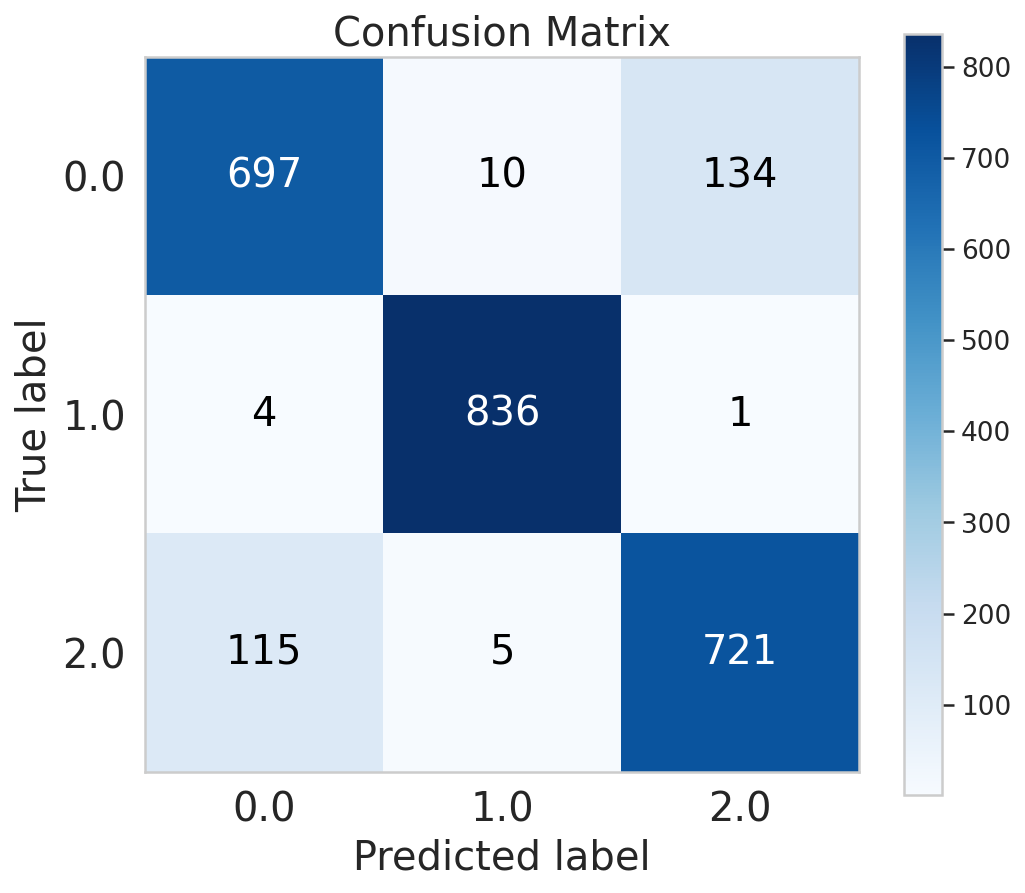

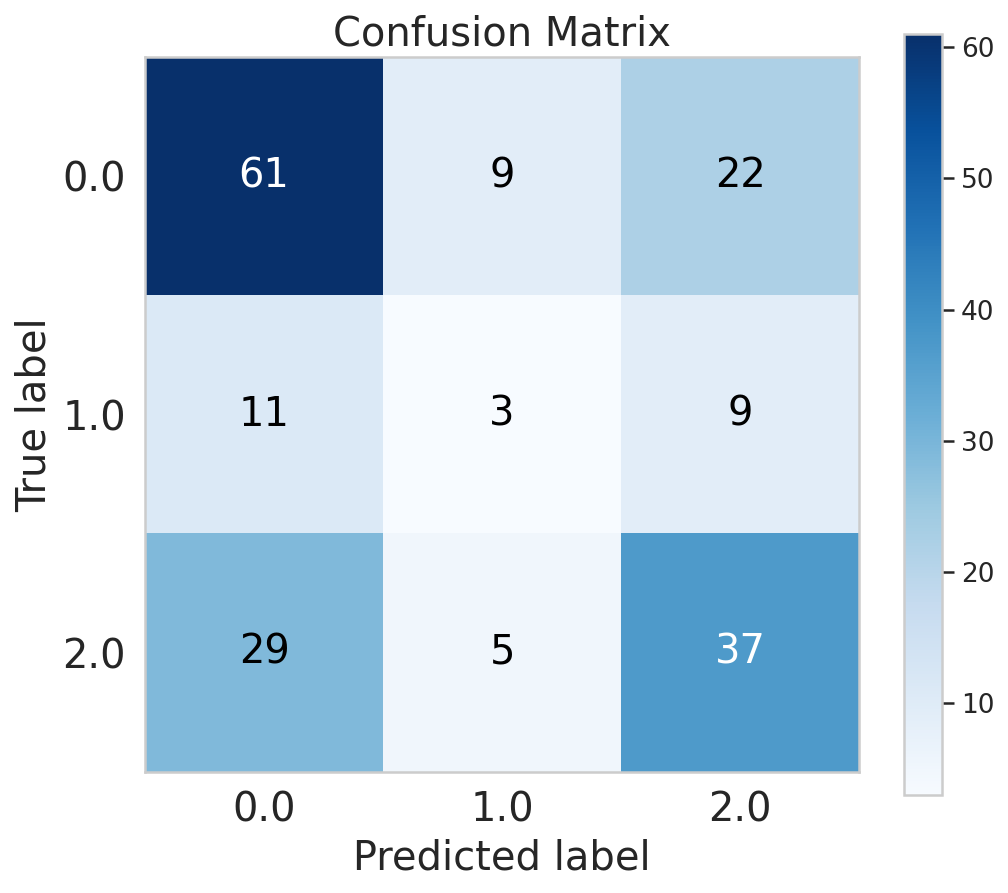

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    #verbose=5,
    #loss_function='CrossEntropy'
)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['CATBOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

     |████████████████████████████████| 66.1 MB 42 kB/s 
0:	learn: 1.0842994	total: 520ms	remaining: 8m 39s
1:	learn: 1.0707521	total: 874ms	remaining: 7m 16s
2:	learn: 1.0566543	total: 1.23s	remaining: 6m 47s
3:	learn: 1.0450442	total: 1.57s	remaining: 6m 31s
4:	learn: 1.0343686	total: 1.93s	remaining: 6m 23s
5:	learn: 1.0236277	total: 2.28s	remaining: 6m 17s
6:	learn: 1.0158393	total: 2.63s	remaining: 6m 13s
7:	learn: 1.0092965	total: 2.99s	remaining: 6m 10s
8:	learn: 1.0012999	total: 3.34s	remaining: 6m 7s
9:	learn: 0.9910935	total: 3.69s	remaining: 6m 5s
10:	learn: 0.9814217	total: 4.05s	remaining: 6m 3s
11:	learn: 0.9694351	total: 4.39s	remaining: 6m 1s
12:	learn: 0.9613769	total: 4.75s	remaining: 6m
13:	learn: 0.9529352	total: 5.1s	remaining: 5m 59s
14:	learn: 0.9460358	total: 5.45s	remaining: 5m 57s
15:	learn: 0.9375281	total: 5.81s	remaining: 5m 57s
16:	learn: 0.9296440	total: 6.16s	remaining: 5m 56s
17:	learn: 0.9226109	total: 6.51s	remaining: 5m 55s
18:	learn: 0.9137018	total

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Confusion Matrix

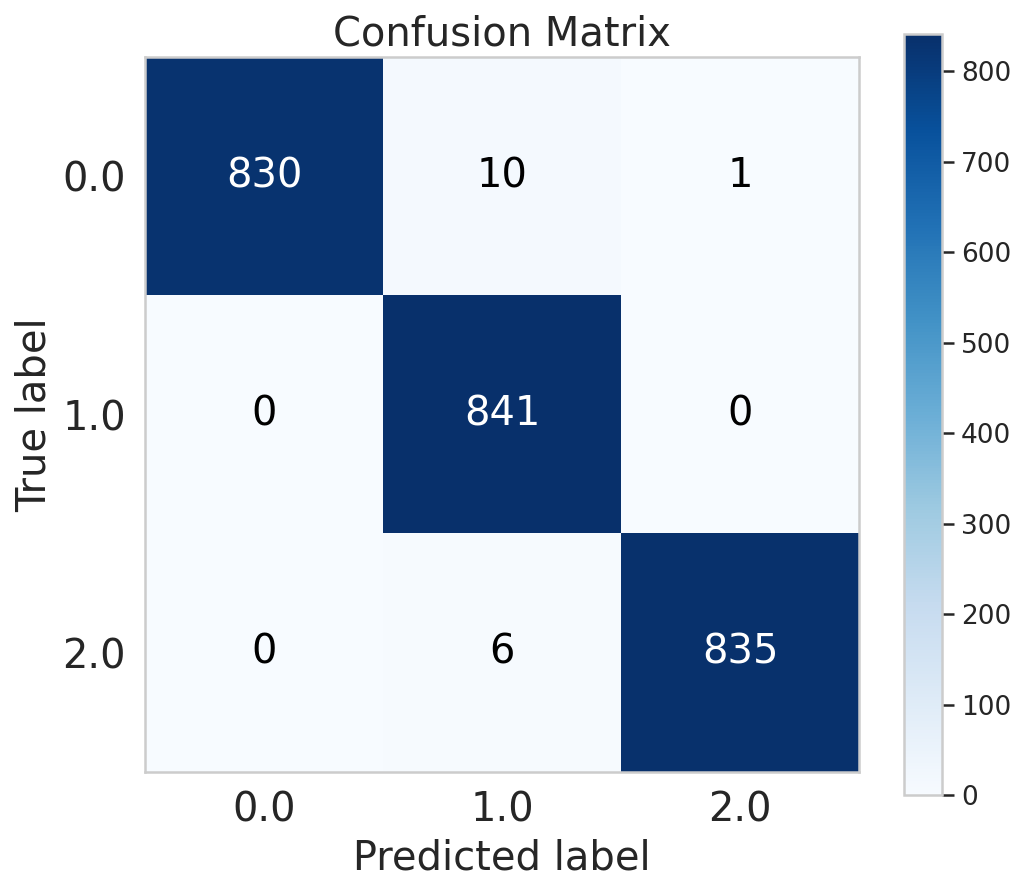

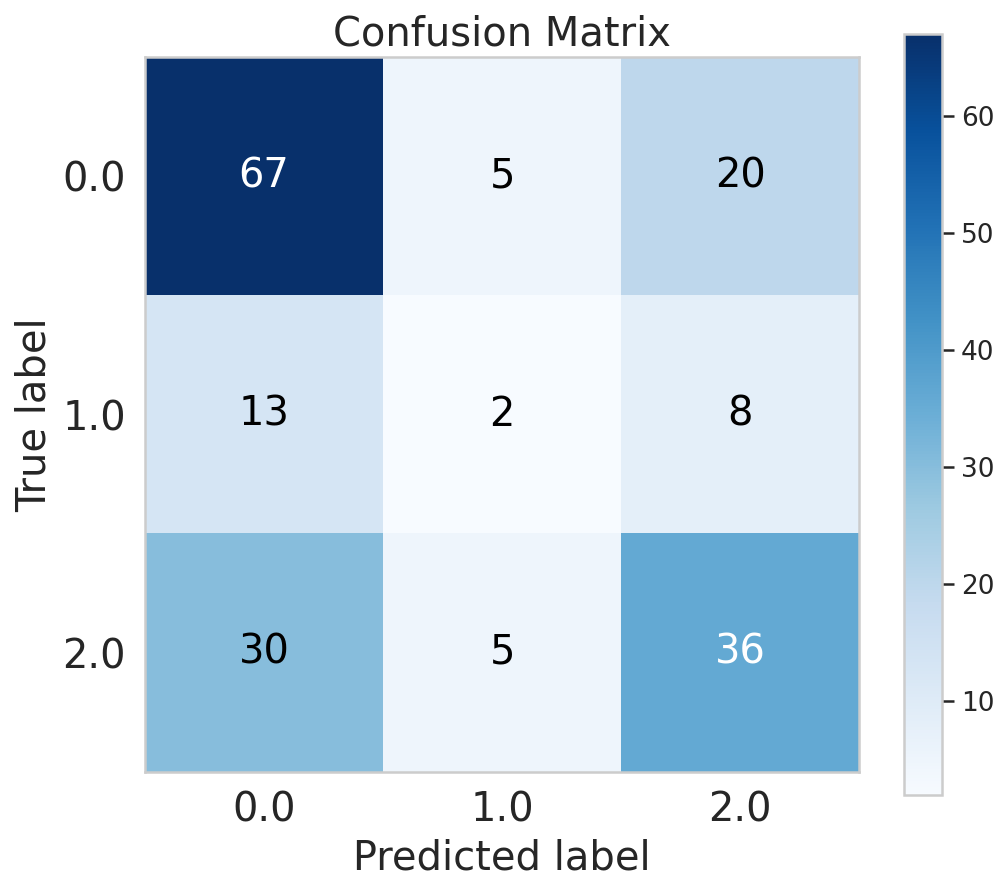

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

XgBoost

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=700)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Confusion Matrix

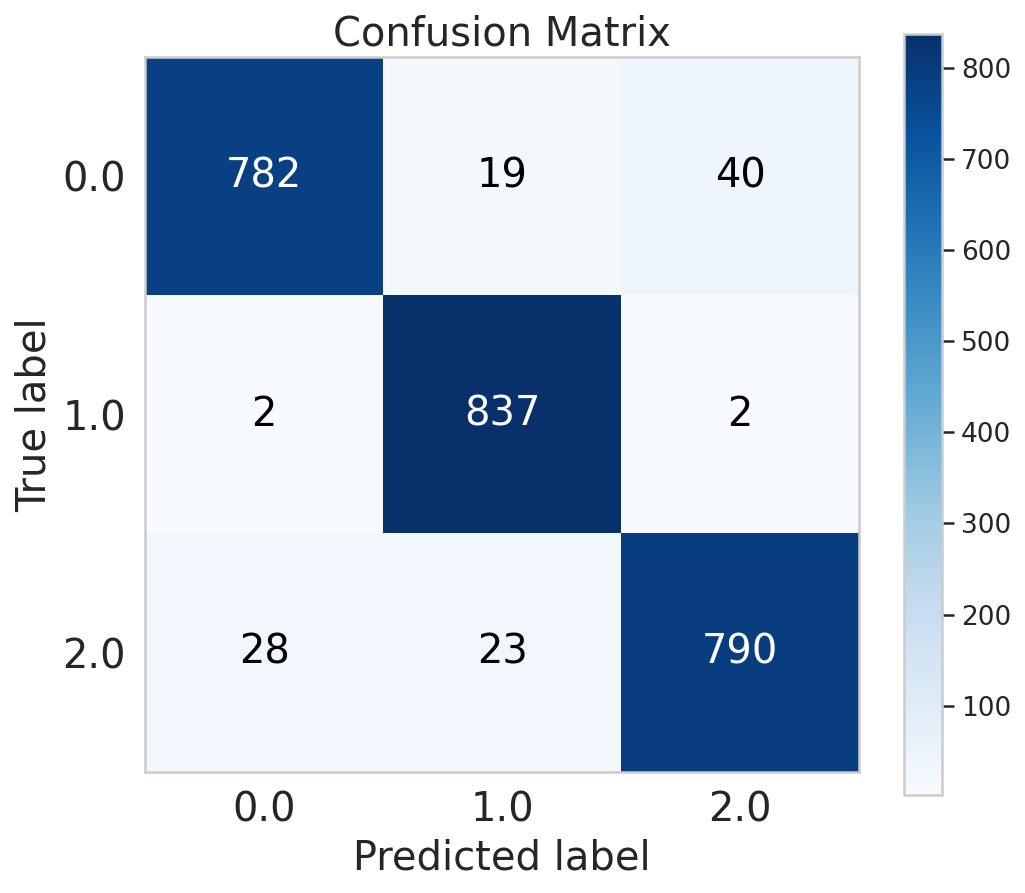

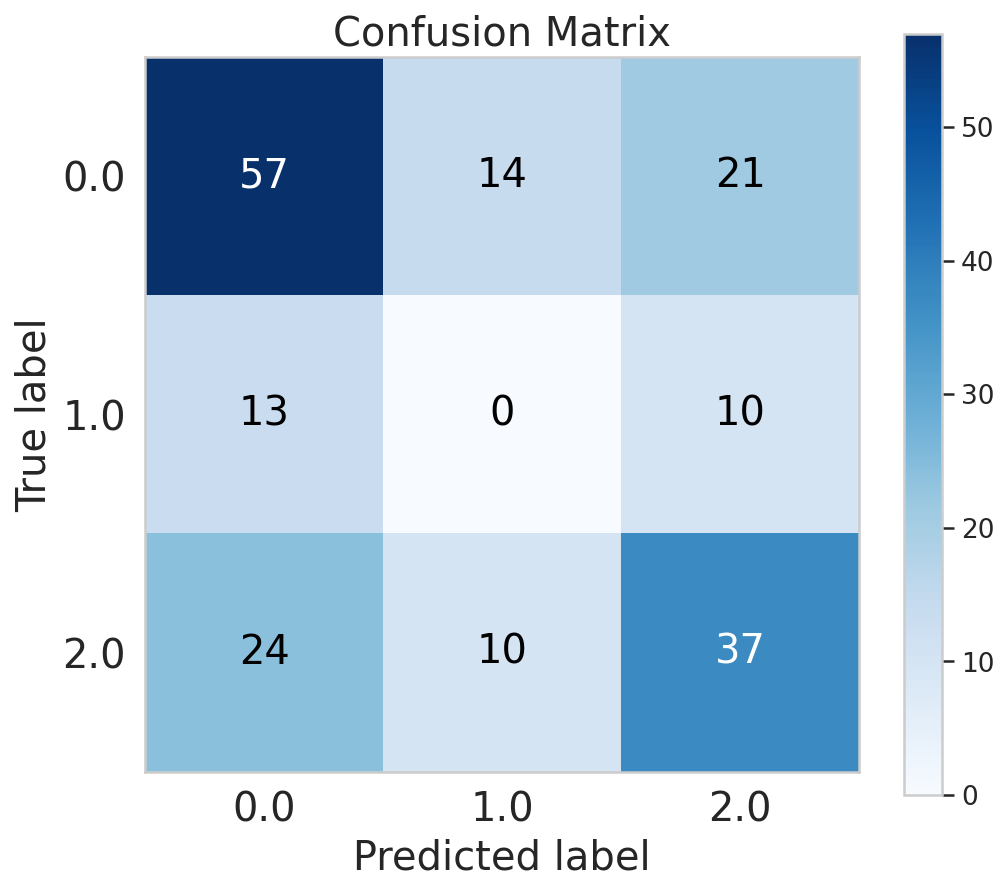

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

SVM

In [ ]:
from sklearn import svm
clf =svm.SVC(kernel='rbf',degree=100)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Confusion Matrix

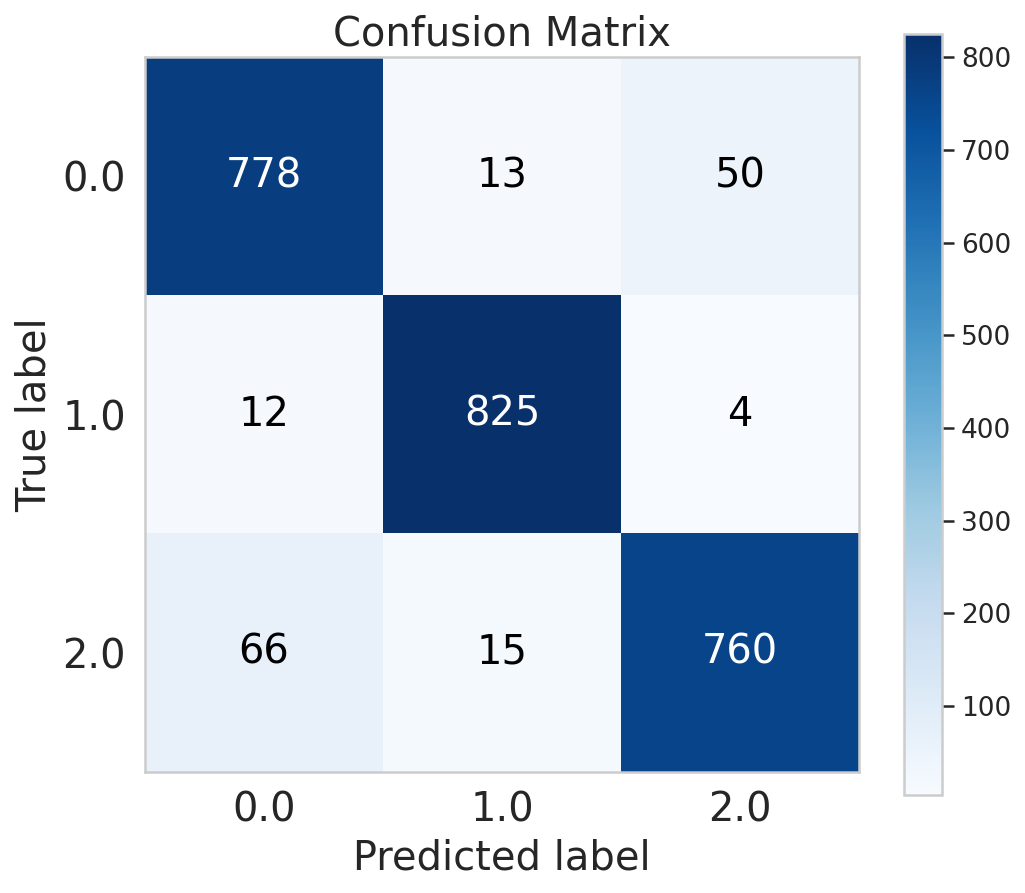

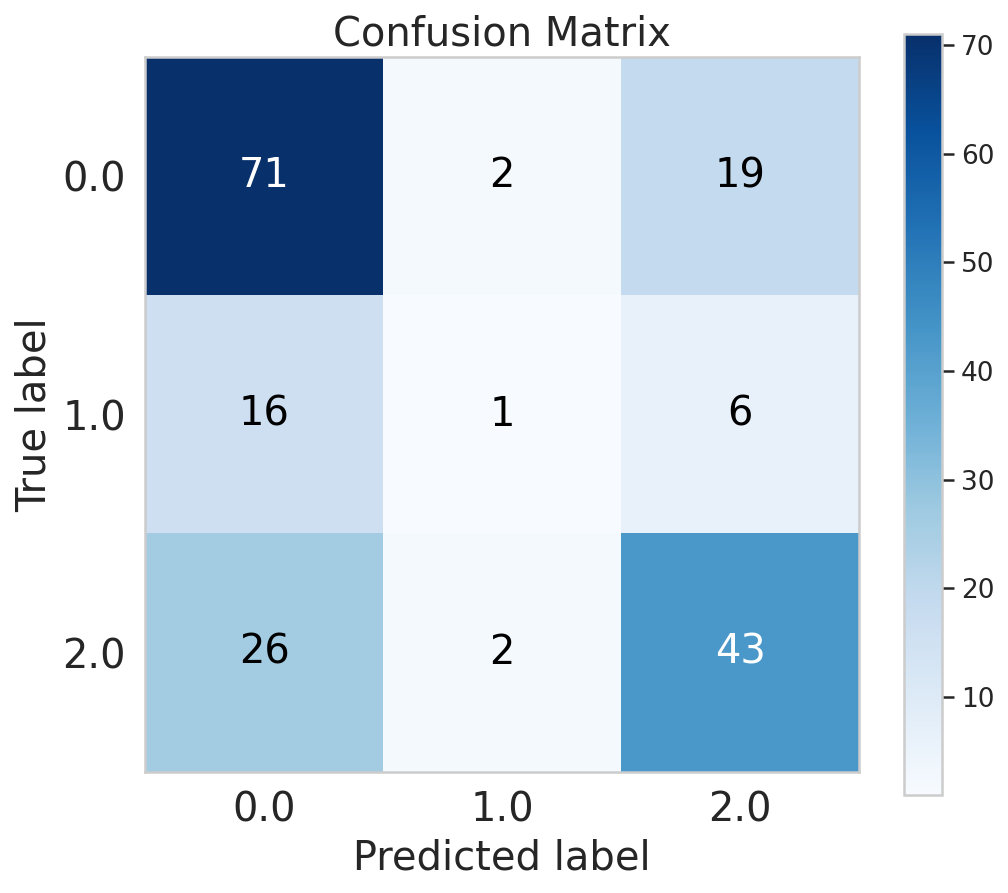

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1000, learning_rate=0.1,n_estimators=500)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['GradientBoosting',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Confusion Matrix

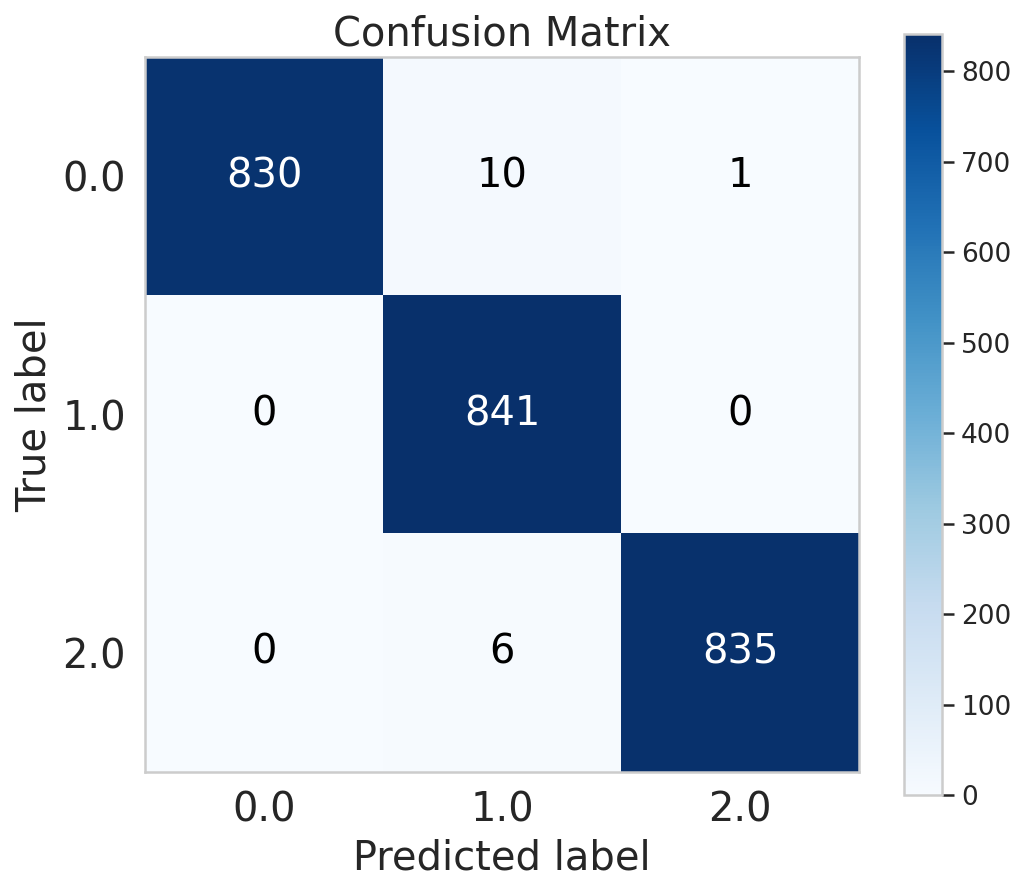

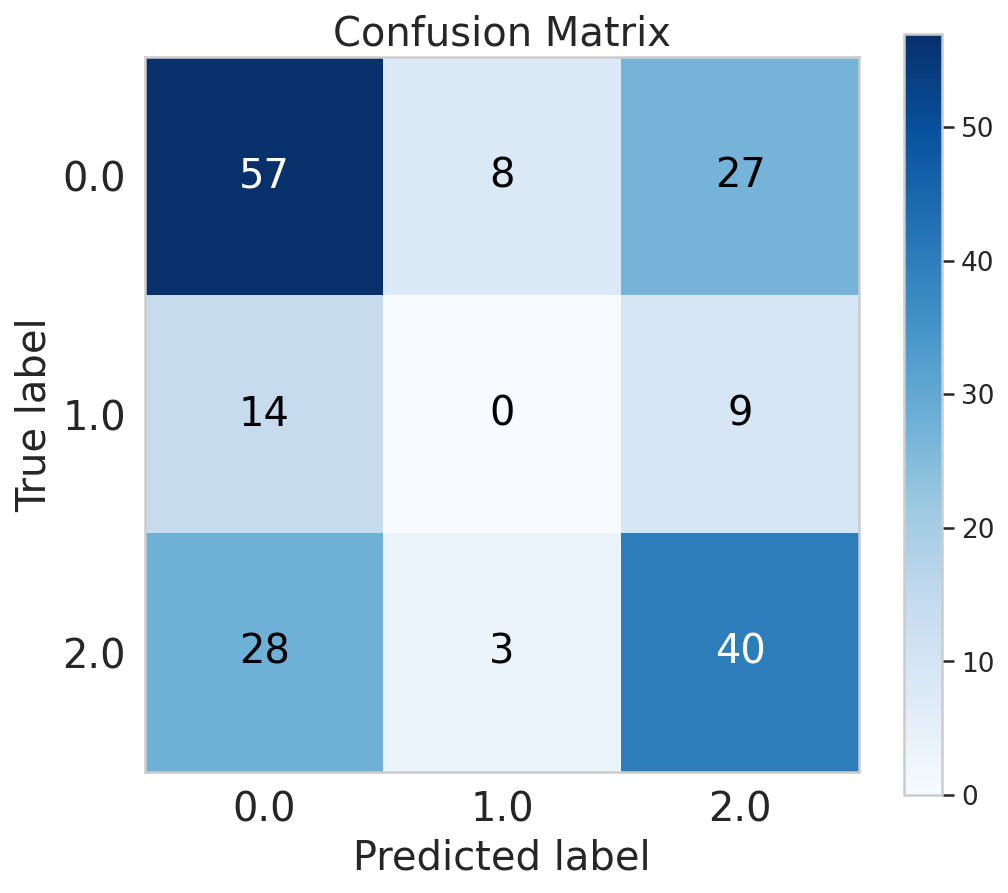

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

ANN


In [ ]:
from sklearn.neural_network import MLPClassifier
clf =MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(16, 16), random_state=100)
# clf =MLPClassifier()
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['ANN',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Confusion Matrix

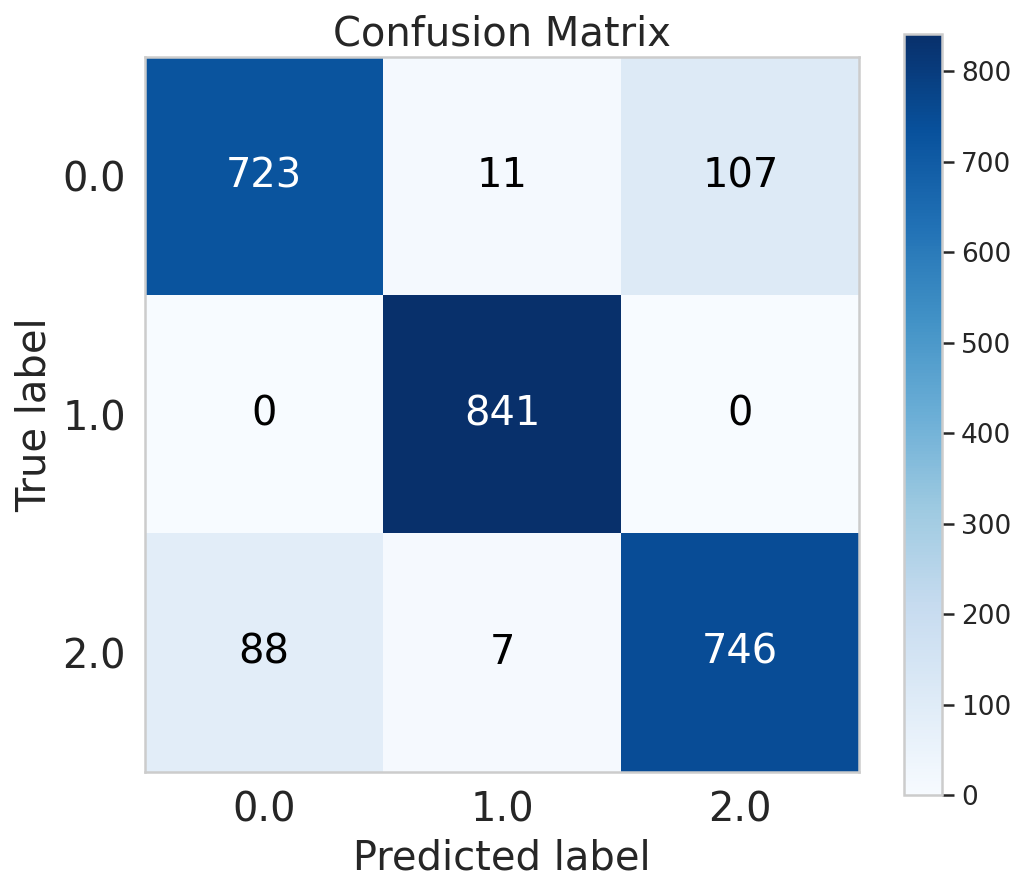

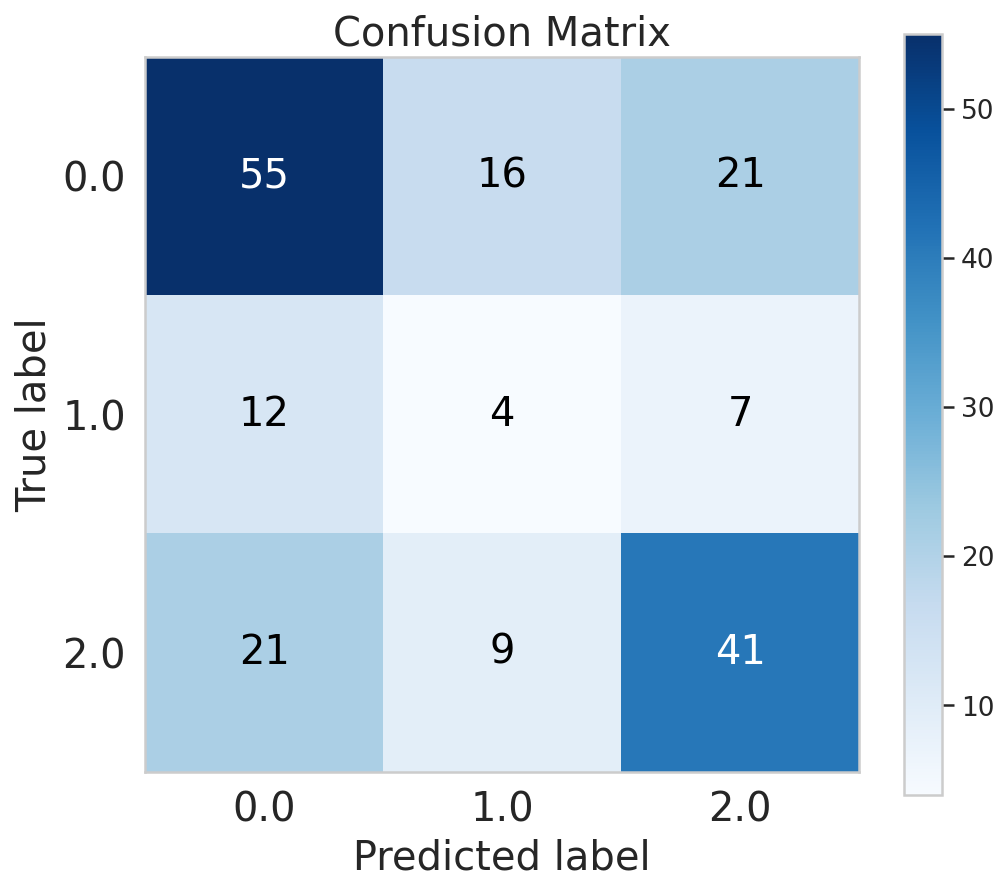

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(8,7),
    title_fontsize='20',
    text_fontsize='20',
    )
y_train=p
y_test=q

Bagging Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Bagging Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)                        


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
7,Bagging Classifier,0.919,0.920,0.919,0.919,0.586,0.483,0.458,0.455
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Weighted Average Probabilities(Soft Voting)

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier



# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)


acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, eclf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Soft Voting',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
7,Bagging Classifier,0.919,0.920,0.919,0.919,0.586,0.483,0.458,0.455
8,Soft Voting,0.919,0.920,0.919,0.919,0.586,0.471,0.458,0.455
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


Voting Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)
clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
clf.fit(X_train, y_train)


acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Voting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False) 

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
9,Voting Classifier,0.939,0.939,0.939,0.938,0.629,0.531,0.502,0.504
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
7,Bagging Classifier,0.919,0.920,0.919,0.919,0.586,0.483,0.458,0.455
8,Soft Voting,0.919,0.920,0.919,0.919,0.586,0.471,0.458,0.455
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
0,Random Forest,0.991,1.000,0.991,0.995,0.127,0.425,0.094,0.152


KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)


acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['KNeighbor Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False) 

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
9,Voting Classifier,0.939,0.939,0.939,0.938,0.629,0.531,0.502,0.504
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
7,Bagging Classifier,0.919,0.920,0.919,0.919,0.586,0.483,0.458,0.455
8,Soft Voting,0.919,0.920,0.919,0.919,0.586,0.471,0.458,0.455
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
10,KNeighbor Classifier,0.759,0.794,0.759,0.747,0.333,0.428,0.397,0.332


RadiusNeighborsClassifier

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
clf = RadiusNeighborsClassifier(radius=5.0)
clf.fit(X_train, y_train)


acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['RadiusNeighbor Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False) 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
9,Voting Classifier,0.939,0.939,0.939,0.938,0.629,0.531,0.502,0.504
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
7,Bagging Classifier,0.919,0.920,0.919,0.919,0.586,0.483,0.458,0.455
8,Soft Voting,0.919,0.920,0.919,0.919,0.586,0.471,0.458,0.455
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
11,RadiusNeighbor Classifier,0.333,0.111,0.333,0.167,0.495,0.165,0.333,0.221


Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)


acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False) 

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
9,Voting Classifier,0.939,0.939,0.939,0.938,0.629,0.531,0.502,0.504
4,SVM,0.937,0.937,0.937,0.936,0.618,0.487,0.474,0.461
7,Bagging Classifier,0.919,0.920,0.919,0.919,0.586,0.483,0.458,0.455
8,Soft Voting,0.919,0.920,0.919,0.919,0.586,0.471,0.458,0.455
2,CATBOOST,0.993,0.993,0.993,0.993,0.565,0.446,0.441,0.437
1,ADABOOST,0.893,0.893,0.893,0.893,0.543,0.442,0.438,0.438
6,ANN,0.916,0.915,0.916,0.915,0.538,0.452,0.450,0.450
5,GradientBoosting,0.993,0.993,0.993,0.993,0.522,0.367,0.394,0.380
3,XGBOOST,0.955,0.955,0.955,0.955,0.505,0.384,0.380,0.382
11,RadiusNeighbor Classifier,0.333,0.111,0.333,0.167,0.495,0.165,0.333,0.221


CNN

In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [ ]:
print(X_train.shape[1])
print(y_train.shape)

512
(2523,)


In [ ]:
# fit and evaluate a model
def evaluate_model(X_train, y_train, X_test, y_test):
	verbose, epochs, batch_size = 0, 10, 512
	n_timesteps, n_features, n_outputs = X_train.shape[0], X_train.shape[1], 3
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
	return accuracy
 
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# run an experiment
def run_experiment(repeats=10):
	# load data
	#trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(X_train, y_train, X_test, y_test)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
 
# run the experiment
run_experiment()

ValueError: ignored

In [ ]:
EPOCHS = 100
BATCH_SIZE = 512

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

history = model.fit(
    X_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_split=0.1, 
    verbose=1, 
    callbacks = [early_stopping],
    shuffle=True
)

def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
      name = metric.replace("_"," ").capitalize()
      plt.subplot(2,2,n+1)
      plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])

      plt.legend()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();
plot_metrics(history)

print(model.evaluate(X_test, y_test))

train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print('(False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print('(True Positives): ', cm[1][1])
  print('Total : ', np.sum(cm[1]))
